In [122]:
# Se importan las librerias a utilizar.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Se importa el acrhivo de 'titanic_M1'.

data = pd.read_excel("C:/Users/alvar/Desktop/IPP/Introducción al Machine Learning/M1/titanic_M1.xlsx")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,2113375.0,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,1515500.0,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,1515500.0,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,1515500.0,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,1515500.0,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


a) Describir brevemente la cantidad de valores faltantes para cada una de las  variables de la base de datos.

pclass         76
survived        0
name            0
sex             0
age           239
sibsp           0
parch           0
ticket          0
fare            0
cabin         927
embarked        2
boat          751
body         1110
home.dest     475
dtype: int64

<AxesSubplot:>

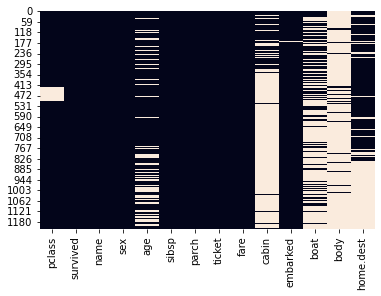

In [124]:
# Idenficamos los valores faltantes.

display(data.isna().sum())
sns.heatmap(data.isnull(), cbar=False)

In [125]:
print("Faltan 76 valores para pclass, 239 para age, 927 para cabin, \
2 para embarked, 751 para boat, 1110 para body y 475 para home.dest \
y sus tipos de datos son: ")

data.dtypes

Faltan 76 valores para pclass, 239 para age, 927 para cabin, 2 para embarked, 751 para boat, 1110 para body y 475 para home.dest y sus tipos de datos son: 


pclass       float64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

b) En la columna Pclass, completar los valores NA, asignando a las personas a la clase 2.

In [126]:
# Se rellenan los valores NA con el valor 2.

data['pclass'] = data['pclass'].fillna(2)
data['pclass'].value_counts()

3.0    619
1.0    323
2.0    277
Name: pclass, dtype: int64

c) En la clase “Sex”, imputar los datos de manera de poder completar la base solo con los valores “male” y “female”.

In [127]:
# Se analizan las categorías del atributo 'sex' y se descubre que posee categorías 'Hombre' y 'Mujer'.

data['sex'].value_counts()

male      679
Mujer     343
female    103
Hombre     94
Name: sex, dtype: int64

In [128]:
# Se reemplazan las categorías 'Hombre' y 'Mujer' con 'male' y 'female', quedando solo estas dos categorías.

data = data.replace("Hombre", "male").replace("Mujer", "female")
data['sex'].value_counts()

male      773
female    446
Name: sex, dtype: int64

d) En los casos de las personas de las cuales no se tenga la edad,rellenar los datos con el promedio de edad de aquellos que sí tienen el dato.

In [129]:
# Se busca el promedio de las edades para rellenar los valores faltantes de la columna 'Age' con este.

mean = data['age'].mean()

print('El promedio de edades es: ', mean)

data['age'] = data['age'].fillna(mean)
data['age']

El promedio de edades es:  30.02627551020408


0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1214    30.026276
1215    30.026276
1216    30.026276
1217    19.000000
1218    30.000000
Name: age, Length: 1219, dtype: float64

e) En la columna embarked, asignar el valor “S” a aquellos datos que se encuentran con valor vacío.

In [130]:
# Se identifican la cantidad de valores faltantes en la columna 'embarked'.
na_embarked = data['embarked'].isna().sum()
print(f"La cantidad de valores faltantes en 'embarked' es: {na_embarked}")

# Se identifican los valores de sus distintas categorías.
data['embarked'].value_counts()

La cantidad de valores faltantes en 'embarked' es: 2


S    847
C    248
Q    122
Name: embarked, dtype: int64

In [131]:
# Se asigna el valor 'S' a los datos faltantes.

data['embarked'] = data['embarked'].fillna("S")
data['embarked'].value_counts()

S    849
C    248
Q    122
Name: embarked, dtype: int64

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin         927
embarked        0
boat          751
body         1110
home.dest     475
dtype: int64

<AxesSubplot:>

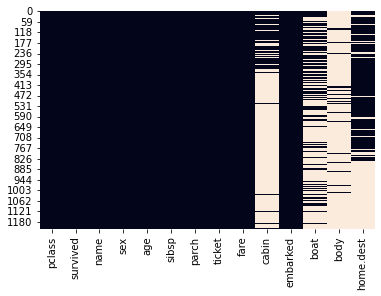

In [132]:
#Se identifican los valores faltantes.

display(data.isna().sum())
sns.heatmap(data.isnull(), cbar=False)